Anomaly detection using Isolation Forest: Implementation

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 This code creates an Isolation Forest classifier instance using the IsolationForest class.   
 Contamination is a parameter that specifies the expected proportion of anomalies in the data. Here, it’s set to 0.1 (10%).

In [13]:
# initialize and fit the model
clf = IsolationForest(contamination=0.1)
clf.fit(X_train)

IsolationForest(contamination=0.1)

The predict method returns labels indicating whether each data point is classified as normal (1) or anomalous (-1) by the model.

-1 это аномалии

In [14]:
# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[ 1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1]
[ 1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1]


score_samples показывает сырые результаты модели, то есть веса

In [23]:
print(clf.score_samples(X_train))
print(clf.score_samples(X_test))

[-0.47416135 -0.41860918 -0.43437094 -0.44698699 -0.61771876 -0.40172345
 -0.54824669 -0.4130464  -0.42107698 -0.59634797 -0.46105237 -0.43917782
 -0.45714754 -0.51564654 -0.5793743  -0.42081387 -0.50843928 -0.46953653
 -0.49750955 -0.41265501 -0.41819745 -0.43277212 -0.65702178 -0.44582717
 -0.41371789 -0.47829811 -0.56582837 -0.41866928 -0.43292784 -0.53238876
 -0.43462609 -0.51176847 -0.47208656 -0.52313059 -0.51980779 -0.44738623
 -0.42333084 -0.46059089 -0.46597515 -0.44340805 -0.440205   -0.51525133
 -0.41862076 -0.50800091 -0.46244132 -0.53332835 -0.4918425  -0.42539434
 -0.49254961 -0.56081468 -0.43477232 -0.50868221 -0.60759594 -0.51026605
 -0.50901663 -0.464121   -0.43774218 -0.48905476 -0.44060942 -0.50830717
 -0.47700135 -0.44821227 -0.54382357 -0.45678439 -0.4129696  -0.43799758
 -0.4155231  -0.50709354 -0.47766709 -0.46328459 -0.45750325 -0.43016834
 -0.44047491 -0.4695699  -0.47069898 -0.4116296  -0.60416606 -0.44763779
 -0.44092846 -0.46358055 -0.41806615 -0.52919384 -0

Visualization

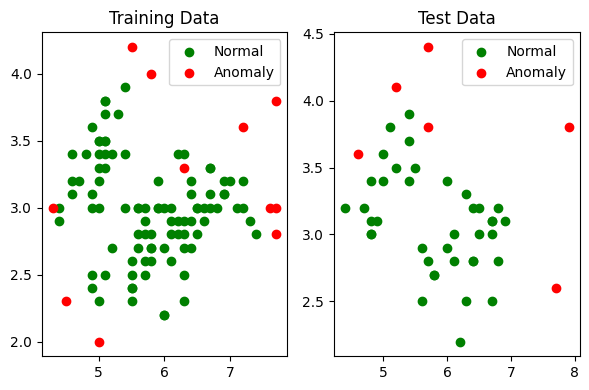

In [16]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')

OneClassSVM

In [17]:
# OneClassSVM позволяет задать параметр nu — долю аномальных объектов в выборке.
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [9]:
svm = OneClassSVM(nu=0.1)
svm.fit(X_train, y_train)

OneClassSVM(nu=0.1)

-1 это аномалии

In [10]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[ 1  1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1  1]
[ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1]


score_samples показывает сырые результаты модели, то есть веса

In [22]:
print(svm.score_samples(X_train))
print(svm.score_samples(X_test))

[5.66071558 5.73026345 5.6904976  5.77928538 5.31826382 5.78679626
 5.21768875 5.70172798 5.49888558 5.11044407 5.75175847 5.51523381
 5.46653263 5.59587231 5.31779973 5.72295929 5.62356471 5.59201278
 5.68172536 5.72363289 5.55680107 5.79317527 4.97735914 5.44381632
 5.81938671 5.43433983 5.16566138 5.73084631 5.54451247 5.5447665
 5.61798322 5.50847677 5.56956988 5.4913148  5.53778256 5.67140649
 5.52230557 5.43300149 5.65186655 5.77211476 5.55300986 5.37475732
 5.55064573 5.60658925 5.69874902 5.68215699 5.58392    5.65021236
 5.47396936 5.31789793 5.6633176  5.34357203 5.16079485 5.45734554
 5.54975941 5.47920848 5.51708271 5.31779967 5.67051651 5.45658153
 5.44280148 5.67421325 5.31791288 5.43217763 5.78184014 5.77715594
 5.74319246 5.67540038 5.60216852 5.47970858 5.67900141 5.8168535
 5.72440617 5.78225286 5.63098403 5.80486135 5.14375933 5.76201371
 5.61579256 5.47788584 5.78844689 5.41582018 5.62427513 5.51422342
 5.54884279 5.48691203 5.57840326 5.43282038 5.56361618 5.504896

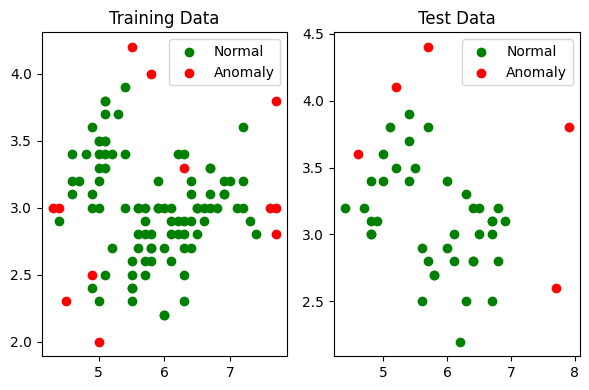

In [12]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')

Local Outlier Factor (LOF)

In [28]:
from sklearn.neighbors import LocalOutlierFactor
# copying dataset
# initializing the Local Outlier Factor algorithm
loc = LocalOutlierFactor(n_neighbors=10)
# training and finding anomalies
y_pred_train = loc.fit_predict(X_train)
y_pred_test = loc.fit_predict(X_test)
print(y_pred_train)
print(y_pred_test)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1  1]
[ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


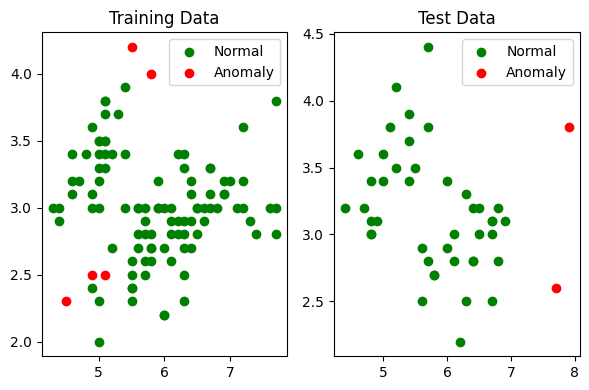

In [29]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')